In [56]:
import pythainlp
import numpy as np
import glob
import logging
import math
import matplotlib.pyplot as plt
import tqdm

In [ ]:
stopwords = set(pythainlp.corpus.common.thai_stopwords())

In [35]:
con = 0
tf = {}
idf = {}
data = {}
filenames = []
file_list = glob.glob('/Users/Dai/Downloads/cmu_papers_merged/*.story')
tokenizer = 'longest'
for i in tqdm.tqdm(range(len(file_list)), position=0, leave=True):
    filepath = file_list[i]
    filename = filepath.split('/')[-1]
    filenames.append(filename)
    with open(filepath, 'r') as f:
        con = 0
        text = []
        abstract = []
        for sen in f.read().split():
            if sen == '@highlight':
                con = 1
            elif con == 0:
                text += pythainlp.tokenize.word_tokenize(sen, engine=tokenizer)
            elif con == 1:
                abstract += pythainlp.tokenize.word_tokenize(sen, engine=tokenizer)
        if filename in data:
            logging.critical(msg='Duplicate filename found: {}'.format(filename))
        data[filename] = {'filepath' : filepath, \
                          'text': text, \
                          'abstract' : abstract \
                         }
#         print(text)
#         print(abstract)
len(data)

100%|█████████▉| 259/260 [02:16<00:00,  2.16it/s]
                                            

100%|██████████| 260/260 [02:16<00:00,  1.91it/s]


260

In [40]:
tf = {}
idf = {}
words = set()
for filename in filenames:
    data[filename]['text_words'] = set()
    word_count = {}
    a = set()
    for w in data[filename]['text']:
        a |= {w}
        words |= {w}
        try:
            word_count[w] += 1
        except:
            word_count[w] = 1
    data[filename]['text_words'] = a
    data[filename]['word_count'] = word_count
    for w in word_count:
        tf[(w, filename)] = 1 + math.log(word_count[w])
        
for w in words:
    dft = 0
    for filename in filenames:
        if w in data[filename]['text_words']:
            dft += 1
    idf[w] = math.log(len(filenames) / dft)

In [162]:
idx = 111
res = []
for w in data[filenames[idx]]['word_count']:
#     print(w, tf[(w, filenames[0])] * idf[w])
    try:
        res.append((w, tf[(w, filenames[idx])] * idf[w]))
    except:
        res.append((w, 0))
res = sorted(res, key=lambda tup: tup[1], reverse=True)
res

[('ผู้สอบบัญชี', 23.109706402113414),
 ('ภาษีอากร', 20.544531680762024),
 ('วัยวุฒิ', 19.44936449632126),
 ('ประมวลรัษฎากร', 18.03403725547501),
 ('ธุรกิจขนาดเล็ก', 17.821443976223456),
 ('กรมสรรพากร', 15.980893876716316),
 ('ทุนจดทะเบียน', 15.950093753696855),
 ('ห้างหุ้นส่วน', 13.266951107284974),
 ('ที่รับรอง', 12.976312711035261),
 ('คุณวุฒิ', 12.637647525884589),
 ('ความมีอยู่', 11.606175472366115),
 ('สอบทาน', 11.497091624173317),
 ('ดาษ', 11.13030637323221),
 ('พนักงานบัญชี', 10.521924133953648),
 ('ร้องขอ', 10.512648555299274),
 ('ผู้มีความรู้', 10.493316712089282),
 ('บัญชี', 9.859559188482526),
 ('เนื้อหาสาระ', 9.729403637312018),
 ('ทุจริต', 9.716243518019368),
 ('อธิบดี', 9.598059657959466),
 ('คงเหลือ', 9.470378960125714),
 ('226', 9.432521749812581),
 ('หนี้สิน', 9.422427585431045),
 ('เกียรติศักดิ์', 9.415052425545419),
 ('ซื่อตรง', 9.415052425545419),
 ('ผู้จัดการฝ่ายบัญชี', 9.364153554739524),
 ('ทาก', 9.341089022179704),
 ('สินทรัพย์', 9.281574311910326),
 ('ภาระผูกพั

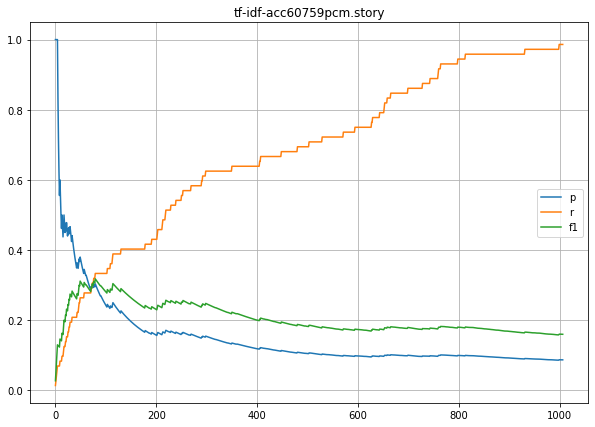

0.31788079470198677
['001', '226', '344', '437', 'กรมสรรพากร', 'การบัญชี', 'กิจการ', 'คงเหลือ', 'ความคาดหวัง', 'ความมีอยู่', 'ความเสื่อมเสีย', 'คะเน', 'คาดหวัง', 'คุณวุฒิ', 'งบการเงิน', 'จดทะเบียน', 'จรรยาบรรณ', 'ซื่อตรง', 'ญ', 'ดาษ', 'ตามหลักการ', 'ทาก', 'ทางการเงิน', 'ที่รับรอง', 'ทุกครั้งที่', 'ทุจริต', 'ทุนจดทะเบียน', 'ธุรกิจขนาดเล็ก', 'นวรัตน์', 'นิติบุคคล', 'บก', 'บัญชี', 'ประชากรศาสตร์', 'ประมวลรัษฎากร', 'ปราณี', 'ผู้จัดการฝ่ายบัญชี', 'ผู้ช่วย', 'ผู้ตอบ', 'ผู้ประกอบการ', 'ผู้ประกอบธุรกิจ', 'ผู้มีความรู้', 'ผู้สอบบัญชี', 'ผู้เสียภาษี', 'พนักงานบัญชี', 'พิว', 'ภาระผูกพัน', 'ภาษี', 'ภาษีอากร', 'ยอด', 'รับรอง', 'ร้องขอ', 'ลงบัญชี', 'ลดา', 'วัยวุฒิ', 'วิชาชีพ', 'ศีลธรรม', 'สมุทรสาคร', 'สมุห์บัญชี', 'สอบทาน', 'สัต', 'สินทรัพย์', 'หนี้สิน', 'หรรษา', 'หุ้นส่วน', 'ห้างหุ้นส่วน', 'อธิบดี', 'อนุญาต', 'อากร', 'เกียรติศักดิ์', 'เนื้อหาสาระ', 'เบียน', 'เป็นสำคัญ', 'เภอ', 'เสียภาษี', 'แนะ', 'แน่ใจ', 'แสดงค่า', 'ไขว้', 'ได้เสีย']


In [172]:
p,r,f = [],[],[]
abs_word_count = set(data[filenames[idx]]['abstract'])
for i in range(len(res)):
    ws = set([ a[0] for a in res[:i+1]])
    ans = (ws & abs_word_count) - stopwords
    r.append(len(ans)/len(abs_word_count - stopwords))
    p.append(len(ans)/len(ws - stopwords))
    try:
        f.append(2*p[-1]*r[-1]/(p[-1]+r[-1]))
    except:
        f.append(0)
plt.figure(figsize=(10,7))
plt.grid()
plt.title('tf-idf-{}'.format(filenames[idx]))
plt.plot(p, label='p')
plt.plot(r, label='r')
plt.plot(f, label='f1')
plt.legend()
plt.show()
print(max(f))
print(sorted([a[0] for a in res[:np.argmax(f)]]))

In [171]:
print(sorted(list(abs_word_count - stopwords)))

['-', '10', '30', '40', '5', 'กระบวนการ', 'การทด', 'การเงิน', 'กิจการ', 'ขาย', 'คงเหลือ', 'คน', 'ความคาดหวัง', 'ความรู้', 'ความสามารถ', 'คา', 'คาดหวัง', 'คุณวุฒิ', 'งาน', 'ชา', 'ซื้อ', 'ญ', 'ดังนี้', 'ดับ', 'ตรวจสอบ', 'ตา', 'ต่อมา', 'ต่ำกว่า', 'ทา', 'ที่สูง', 'ธุรกิจ', 'ธุรกิจขนาดเล็ก', 'นา', 'บริการ', 'บัญชี', 'ประมวลรัษฎากร', 'ปริญญาตรี', 'ปัจจัย', 'ปัจจัยหลัก', 'ปี', 'ผลการศึกษา', 'ผู้จัดการฝ่ายบัญชี', 'ผู้ประกอบการ', 'ผู้สอบบัญชี', 'พนักงานบัญชี', 'ภาษีอากร', 'มีประสบการณ์', 'มีอายุ', 'ยอด', 'ระดับ', 'รายการ', 'ลักษณะ', 'วัยวุฒิ', 'วิชาชีพ', 'วิธีการ', 'วุฒิการศึกษา', 'สรุป', 'สอบ', 'สินทรัพย์', 'หนี้สิน', 'หลัก', 'อา', 'เชียงใหม่', 'เนื้อหาสาระ', 'เพศหญิง', 'เภอ', 'เมือง', 'เรื่อง', 'เลือก', 'แนะ', 'แน่ใจ', 'แหน่ง']


In [175]:
abs_word_count & set([a[0] for a in res[:np.argmax(f)]])

{'กิจการ',
 'คงเหลือ',
 'ความคาดหวัง',
 'คาดหวัง',
 'คุณวุฒิ',
 'ญ',
 'ธุรกิจขนาดเล็ก',
 'บัญชี',
 'ประมวลรัษฎากร',
 'ผู้จัดการฝ่ายบัญชี',
 'ผู้ประกอบการ',
 'ผู้สอบบัญชี',
 'พนักงานบัญชี',
 'ภาษีอากร',
 'ยอด',
 'วัยวุฒิ',
 'วิชาชีพ',
 'สินทรัพย์',
 'หนี้สิน',
 'เนื้อหาสาระ',
 'เภอ',
 'แนะ',
 'แน่ใจ'}

In [180]:
print('in abs: {}/{}'.format(len(set([a[0] for a in res[:np.argmax(f)]]) & abs_word_count -stopwords), len(abs_word_count-stopwords)))

in abs: 23/72


In [177]:
len(abs_word_count & set([a[0] for a in res[:np.argmax(f)]]) - stopwords)/len(list(abs_word_count - stopwords))

0.3194444444444444

In [137]:
abs_word_count - stopwords

{')',
 '1',
 '2',
 '3',
 'การพัฒนา',
 'การศึกษา',
 'การอนุรักษ์',
 'คณะ',
 'คริสต์ศาสนา',
 'คริสเตียน',
 'ความเข้าใจ',
 'คุณค่า',
 'จังหวัด',
 'จุดมุ่งหมาย',
 'ดังนั้น',
 'ดังนี้',
 'ทา',
 'ที่จะ',
 'ท์',
 'นิกาย',
 'บรรลุเป้าหมาย',
 'บริบท',
 'ปัจจัย',
 'ปัญหา',
 'พัฒนา',
 'พิพิธภัณฑ์',
 'มากยิ่งขึ้น',
 'มีคุณค่า',
 'มีชีวิต',
 'มีประวัติ',
 'มีปัญหา',
 'รส',
 'ระบบ',
 'รูปแบบ',
 'ลักษณะ',
 'ศาสตร์',
 'ศิลปะสถาปัตยกรรม',
 'ศึกษา',
 'สถาปัตยกรรม',
 'สื่อ',
 'ส่งผล',
 'อนุรักษ์',
 'อนุสรณ์สถาน',
 'อา',
 'อาคาร',
 'อเมริกัน',
 'เข้ามา',
 'เชียงใหม่',
 'เผยแพร่',
 'เพ',
 'เภอ',
 'เมือง',
 'เรียน',
 'เรียนรู้',
 'เสนอ',
 'เหมาะสม',
 'แตน',
 'แตส',
 'แนวทาง',
 'แหล่ง',
 'โบสถ์',
 'โปร',
 'โปรเตสแตนท์',
 'โรงเรียน',
 'ให้การ',
 'ไบที'}

In [181]:
len(res)

1007

In [182]:
print('in abs: {}/{}'.format(len(set([a[0] for a in res]) & abs_word_count), len(abs_word_count)))
print('not in abs:',len(set([a[0] for a in res]) - abs_word_count))

in abs: 103/104
not in abs: 904


100%|██████████| 260/260 [01:04<00:00,  4.02it/s]


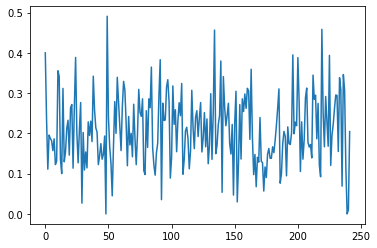

(0.20819342788900252, 0.08783477981687456)

In [190]:
def get_word_order_tf_idf(idx):
    res = []
    for w in data[filenames[idx]]['word_count']:
    #     print(w, tf[(w, filenames[0])] * idf[w])
        try:
            res.append((w, tf[(w, filenames[idx])] * idf[w]))
        except:
            res.append((w, 0))
    res = sorted(res, key=lambda tup: tup[1], reverse=True)
    return res

def evaluate_f1(res, idx):
    p,r,f = [],[],[]
    abs_word_count = set(data[filenames[idx]]['abstract'])
    for i in range(len(res)):
        ws = set([ a[0] for a in res[:i+1]])
        ans = (ws & abs_word_count) - stopwords
        try:
            r.append(len(ans)/len(abs_word_count - stopwords))
        except:
            r.append(0)
        try:
            p.append(len(ans)/len(ws - stopwords))
        except:
            p.append(0)
        try:
            f.append(2*p[-1]*r[-1]/(p[-1]+r[-1]))
        except:
            f.append(0)
#     plt.figure(figsize=(10,7))
#     plt.grid()
#     plt.title('tf-idf-{}'.format(filenames[idx]))
#     plt.plot(p, label='p')
#     plt.plot(r, label='r')
#     plt.plot(f, label='f1')
#     plt.legend()
#     plt.show()
#     print(max(f))
#     print(sorted([a[0] for a in res[:np.argmax(f)]]))
    return max(f)

def evaluate_mean_f1(filenames):
    f = []
    for i in tqdm.tqdm(range(len(filenames)), position=0, leave=True):
        res = get_word_order_tf_idf(i)
        if len(res) == 0:
            continue
        f.append(evaluate_f1(res, i))
    return f

f = evaluate_mean_f1(filenames)
plt.plot(f)
plt.show()
np.mean(f), np.std(f)

### Result using TF-IDF as classification
Mean F1: 0.20819342788900252

STD F1:  0.08783477981687456

Max F1: 0.49090909090909085

Min F1: -

In [192]:
max(f), min(f)

(0.49090909090909085, 0)